Name : Vaidik Pandya
Roll No : 21BCP228
Division : 4

Assignment 5 : Implement deep learning model to measure the performance of the student on the given dataset .


Step 1 : Importing all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

/Users/swayampalrecha/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


Step 2 : read the csv file Student_performance.csv in the pandas Dataframe.

In [2]:
data = pd.read_csv("Student_Performance.csv")

Step 3 : Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [4]:
data.shape

(10000, 6)

In [5]:
data.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [6]:
data.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


Step 4 : Data Treatment and Data Cleaning

In [7]:
data.duplicated().sum()

127

In [8]:
data.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [9]:
data_after_treatment = data.drop_duplicates()

In [10]:
data_after_treatment.duplicated().sum()

0

Step 5 : Finding the Correlation between features

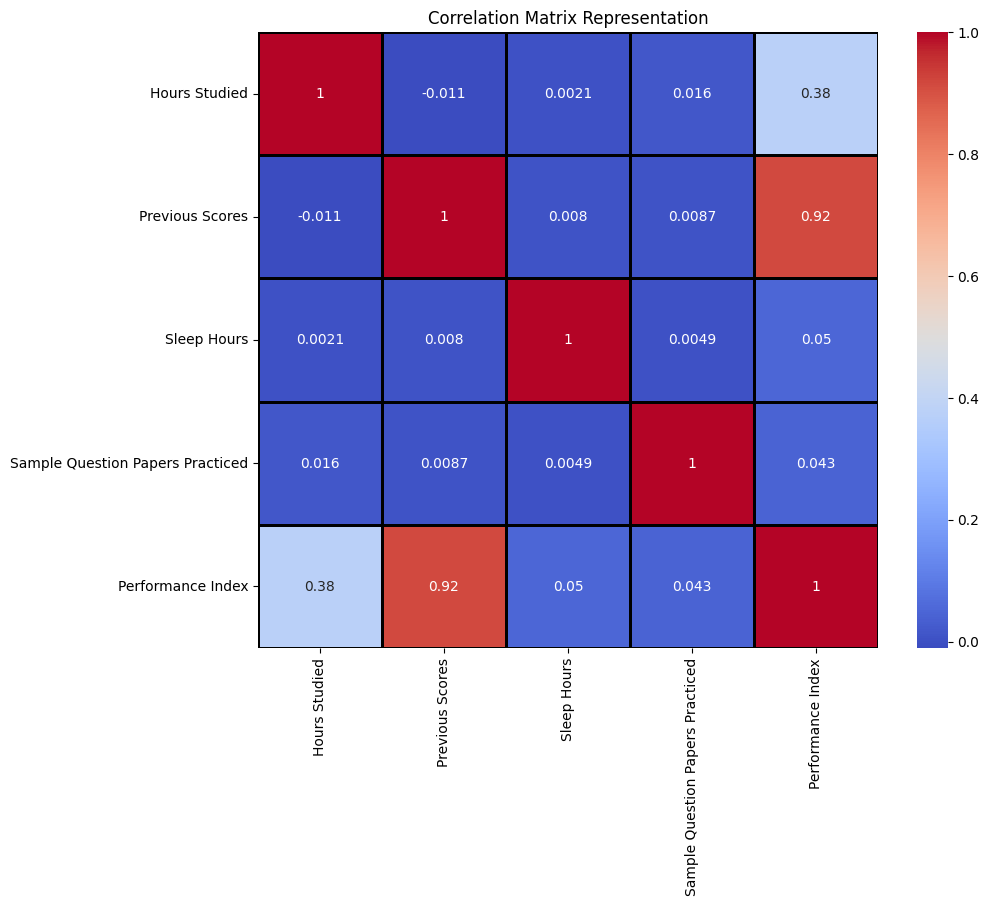

In [11]:
corr_mat = data_after_treatment.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", linewidths=1, linecolor="black")
plt.title("Correlation Matrix Representation")
plt.show()

Step 6 : Data Labelling

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label = LabelEncoder()
data_after_treatment.iloc[ :,2] = label.fit_transform(data_after_treatment.iloc[ :,2])
data_after_treatment.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [18]:
X = data_after_treatment.drop("Performance Index",axis = 1).values
Y = data_after_treatment["Performance Index"].values

In [19]:
X

array([[7, 99, 1, 9, 1],
       [4, 82, 0, 4, 2],
       [8, 51, 1, 7, 2],
       ...,
       [6, 83, 1, 8, 5],
       [9, 97, 1, 7, 0],
       [7, 74, 0, 8, 1]], dtype=object)

In [20]:
Y

array([91., 65., 45., ..., 74., 95., 64.])

Step 7 : Spliting the data for training and testing

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [25]:
x_train, x_test, y_train, y_test = train_test_split(X,Y,random_state=0)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

Step 8 : creating the Model

In [26]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, verbose=0)

Step 9:Prediction on x_test

In [27]:
y_pred = model.predict(X_test_scaled)
y_pred

78/78 [==============================] - 0s 4ms/step


array([[73.000534],
       [27.501244],
       [39.698193],
       ...,
       [78.79061 ],
       [36.58552 ],
       [62.199497]], dtype=float32)

In [28]:
y_test

array([74., 30., 40., ..., 76., 37., 61.])

Step 10 :Finding Accuracy

In [ ]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
r2 = r2_score(y_test,y_pred)
print("R2_Score:", r2)

R2_Score: 0.9875591875850025


In [31]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 4.578681951127352
